In [3]:
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
super_classes = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']

num_classes = len(classes)
num_super_classes = len(super_classes)

In [4]:
import tensorflow as tf

ds_train, ds_test = tf.keras.datasets.cifar100.load_data()

ds_train = tf.data.Dataset.from_tensor_slices(ds_train)
ds_test = tf.data.Dataset.from_tensor_slices(ds_test)

type(ds_train), type(ds_test)

169001437/169001437 [==============================] - 4s 0us/step


(tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset,
 tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset)

En el siguiente bloque de código, se realiza un análisis detallado de las dimensiones del dataset y de sus elementos. Este proceso es fundamental para comprender la estructura de los datos de entrada y garantizar una manipulación adecuada durante el desarrollo del proyecto de inteligencia artificial.

In [5]:
num_train = len(ds_train)
num_test = len(ds_test)
print(f'Train dataset size: {num_train}')
print(f'Test dataset size: {num_test}')

train_image_spec, train_label_spec = ds_train.element_spec
test_image_spec, test_label_spec = ds_train.element_spec

print(f'Train elements shape: {train_image_spec.shape}, {train_label_spec.shape}')
print(f'Test elements shape: {test_image_spec.shape}, {test_label_spec.shape}')

print(f'Train elements type: {train_image_spec.dtype}, {train_label_spec.dtype}')
print(f'Test elements type: {train_image_spec.dtype}, {train_label_spec.dtype}')

Train dataset size: 50000
Test dataset size: 10000
Train elements shape: (32, 32, 3), (1,)
Test elements shape: (32, 32, 3), (1,)
Train elements type: <dtype: 'uint8'>, <dtype: 'int64'>
Test elements type: <dtype: 'uint8'>, <dtype: 'int64'>


Nos fijamos que en los datasets resultantes las imágenes tienen un formato adecuado de 32x32 pixels en 3 canales (RGB), pero las etiquetas deberían ser escalares. Convertimos las etiquetas para que tengan dimensión ().

In [6]:
# Las etiquetas son tensores de dimensión (1,) convertimos a ()
def reshape_label(image, label):
  return image, tf.reshape(label, ())

ds_train = ds_train.map(reshape_label)
ds_test = ds_test.map(reshape_label)

A continuación podemos echar un vistazo a 4 imágenes del dataset y comprobar que las etiquetas se adecuan a su imagen asociada.

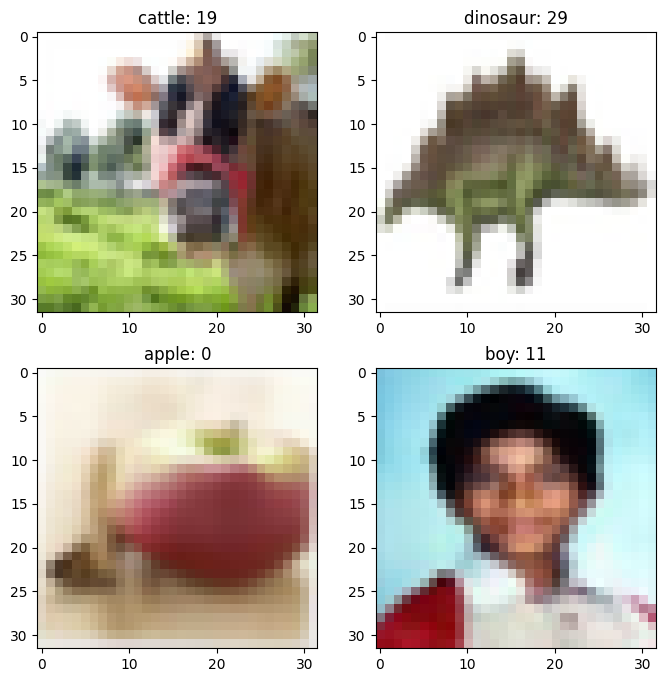

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
# Mostramos 4 imágenes del dataset de entrenamiento
for i, x in enumerate(ds_train.take(4)):
  image, label = x
  plt.subplot(2, 2, i+1)
  plt.imshow(image)
  plt.title(f"{classes[label]}: {label}")

Todo parece correcto, realizamos ahora, un preprocesamiento de las imágenes y etiquetas, para convertirlas en inputs adecuados para nuestros modelos. Definimos la función preprocessing, que aplicaremos a los elementos de los dataset de entrenamiento y test.

In [8]:
def preprocessing(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  label = tf.one_hot(label, depth=num_classes)
  return image, label

ds_train = ds_train.map(preprocessing, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocessing, num_parallel_calls=tf.data.AUTOTUNE)

Vemos que la normalización ha tenido éxito

In [9]:
for elem in ds_train.take(1):
  print(elem)

(<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7647059 , 0.8039216 , 0.75686276],
        [0.83137256, 0.8784314 , 0.8       ],
        [0.7137255 , 0.7607843 , 0.654902  ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.6666667 , 0.6901961 , 0.5882353 ],
        [0.6313726 , 0.65882355, 0.50980395],
        [0.57254905, 0.6039216 , 0.44313726]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7411765 , 0.78039217, 0.6627451 ],
        [0.6509804 , 0.69803923, 0.50980395],
        [0.4745098 , 0.52156866, 0.34117648]],

       ...,

       [[0.5803922 , 0.7254902 , 0.30980393],
        [0.556

Definimos como datos de validación parte de los datos de entrenamiento, contamos con 50_000 muestras utilizaremos un 20% para validación (10_000 imágenes para validación y 40_000 para ajustar los pesos durante cada época)

In [10]:
ratio = 0.2
validation_size = int(ratio * num_train) # 10_000
base_ds_val = ds_train.take(validation_size)
base_ds_fit = ds_train.skip(validation_size)

len(base_ds_val), len(base_ds_fit)

(10000, 40000)

Los inputs a la red serán lotes de 64 imágenes del dataset para ajuste ds_fit.\
Utilizamos .cache() para guardar en caché las transformaciones realizadas con .map(), usamos .shuffle() y .batch() para mezclar los elementos antes de formar los lotes, consiguiendo así lotes únicos para cada época. Finalmente con .prefetch() especificamos que el siguientes lotes se carguen de manera paralela mientras se entrena una época.

In [11]:
batch_size = 128 # multiplo de 32
ds_fit = base_ds_fit.cache()
ds_fit = ds_fit.shuffle(buffer_size=len(ds_fit))
ds_fit = ds_fit.batch(batch_size)
ds_fit = ds_fit.prefetch(tf.data.experimental.AUTOTUNE)

Para el dataset de validación ds_val, no mezclamos ya que no influye en los ajustes de pesos. Aunque si que tendrá influencia el detener las épocas en función de los datos de validación.

In [12]:
batch_size = 128
ds_val = base_ds_val.cache()
ds_val = ds_val.batch(batch_size)
ds_val = ds_val.prefetch(tf.data.experimental.AUTOTUNE)

Preparamos el learning rate adaptativo a usar en el callback

In [13]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

# Define a function to adjust the learning rate
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001  # First 5 epochs
    elif epoch < 10:
        return 0.0005  # Next 5 epochs
    else:
        return 0.0001  # Rest of the epochs

# Create the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Crear el EarlyStopping callback con la función on_train_end
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)


# Define your callbacks
callbacks = [early_stopping, lr_scheduler, reduce_lr]

Añadimos un random flip y rotación a las imágenes (data augmentation)

In [14]:
"""import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

# Define the data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])"""



'import matplotlib.pyplot as plt\nimport numpy as np\nimport tensorflow as tf\nimport tensorflow_datasets as tfds\n\nfrom tensorflow.keras import layers\n\n# Define the data augmentation layer\ndata_augmentation = tf.keras.Sequential([\n    layers.RandomFlip("horizontal_and_vertical"),\n    layers.RandomRotation(0.2),\n])'

Como queremos obtener los mismos resultados para cualquier usuario que ejecute el programa, usamos una seed para inicializar los pesos posteriormente.

In [15]:
# Establecer la semilla global
seed_value = 42
tf.random.set_seed(seed_value)

Arquitectura de la red

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

# Specify the regularization strength
l2_reg_strength = 0.01

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(l2_reg_strength)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_reg_strength)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_reg_strength)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_reg_strength)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_reg_strength)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


# Hacemos una copia del modelo, con los mismos pesos y la misma arquitectura
model_test = tf.keras.models.clone_model(model)

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo utilizando el conjunto de datos
history = model.fit(ds_fit, epochs=40, validation_data=ds_val, callbacks=callbacks)

last_epoch = len(history.history['val_loss'])

Epoch 1/40
313/313 [==============================] - 25s 25ms/step - loss: 8.6931 - accuracy: 0.1190 - val_loss: 7.7013 - val_accuracy: 0.0196 - lr: 0.0010
Epoch 2/40
313/313 [==============================] - 7s 21ms/step - loss: 4.5624 - accuracy: 0.2303 - val_loss: 4.7161 - val_accuracy: 0.1641 - lr: 0.0010
Epoch 3/40
313/313 [==============================] - 7s 21ms/step - loss: 3.9384 - accuracy: 0.2979 - val_loss: 4.1581 - val_accuracy: 0.2451 - lr: 0.0010
Epoch 4/40
313/313 [==============================] - 6s 21ms/step - loss: 3.7520 - accuracy: 0.3301 - val_loss: 3.7843 - val_accuracy: 0.3201 - lr: 0.0010
Epoch 5/40
313/313 [==============================] - 7s 22ms/step - loss: 3.6783 - accuracy: 0.3440 - val_loss: 3.7135 - val_accuracy: 0.3394 - lr: 0.0010
Epoch 6/40
313/313 [==============================] - 7s 21ms/step - loss: 3.1491 - accuracy: 0.4130 - val_loss: 3.1980 - val_accuracy: 0.3897 - lr: 5.0000e-04
Epoch 7/40
313/313 [==============================] - 7s 22

Hemos comprobado que a partir de la época 11 se sobreentrena, ahora usaremos todos los datos de entrenamiento para el modelo real, sabiendo que a partir de l esa época se sobreentrena.

In [18]:
batch_size = 128
ds_fit = ds_train.cache()
ds_fit = ds_fit.shuffle(buffer_size=len(ds_fit))
ds_fit = ds_fit.batch(batch_size)
ds_fit = ds_fit.prefetch(tf.data.experimental.AUTOTUNE)
print(last_epoch)

33


In [19]:
# Compilar el modelo
model_test.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Entrenar el modelo utilizando el conjunto de datos
model_test.fit(ds_fit, epochs=last_epoch,callbacks=callbacks[1:]) # solo usamos el callback de lr adaptativo

Epoch 1/33
391/391 [==============================] - ETA: 0s - loss: 8.0141 - accuracy: 0.1323

391/391 [==============================] - 16s 20ms/step - loss: 8.0141 - accuracy: 0.1323 - lr: 0.0010
Epoch 2/33
390/391 [============================>.] - ETA: 0s - loss: 4.2889 - accuracy: 0.2589

391/391 [==============================] - 8s 20ms/step - loss: 4.2885 - accuracy: 0.2590 - lr: 0.0010
Epoch 3/33
391/391 [==============================] - ETA: 0s - loss: 3.8133 - accuracy: 0.3148

391/391 [==============================] - 8s 20ms/step - loss: 3.8133 - accuracy: 0.3148 - lr: 0.0010
Epoch 4/33
389/391 [============================>.] - ETA: 0s - loss: 3.7217 - accuracy: 0.3400

391/391 [==============================] - 8s 21ms/step - loss: 3.7214 - accuracy: 0.3399 - lr: 0.0010
Epoch 5/33
391/391 [==============================] - ETA: 0s - loss: 3.6295 - accuracy: 0.3562

391/391 [==============================] - 8s 19ms/step - loss: 3.6295 - accuracy: 0.3562 - lr: 0.0010
Epoch 6/33
391/391 [==============================] - ETA: 0s - loss: 3.1414 - accuracy: 0.4134

391/391 [==============================] - 8s 20ms/step - loss: 3.1414 - accuracy: 0.4134 - lr: 5.0000e-04
Epoch 7/33
391/391 [==============================] - ETA: 0s - loss: 3.0022 - accuracy: 0.4331

391/391 [==============================] - 8s 19ms/step - loss: 3.0022 - accuracy: 0.4331 - lr: 5.0000e-04
Epoch 8/33
391/391 [==============================] - ETA: 0s - loss: 2.9579 - accuracy: 0.4461

391/391 [==============================] - 8s 21ms/step - loss: 2.9579 - accuracy: 0.4461 - lr: 5.0000e-04
Epoch 9/33
390/391 [============================>.] - ETA: 0s - loss: 2.9381 - accuracy: 0.4583

391/391 [==============================] - 8s 20ms/step - loss: 2.9386 - accuracy: 0.4582 - lr: 5.0000e-04
Epoch 10/33
391/391 [==============================] - ETA: 0s - loss: 2.9065 - accuracy: 0.4649

391/391 [==============================] - 8s 19ms/step - loss: 2.9065 - accuracy: 0.4649 - lr: 5.0000e-04
Epoch 11/33
390/391 [============================>.] - ETA: 0s - loss: 2.4758 - accuracy: 0.5476

391/391 [==============================] - 8s 20ms/step - loss: 2.4757 - accuracy: 0.5476 - lr: 1.0000e-04
Epoch 12/33
391/391 [==============================] - ETA: 0s - loss: 2.1995 - accuracy: 0.5803

391/391 [==============================] - 8s 19ms/step - loss: 2.1995 - accuracy: 0.5803 - lr: 1.0000e-04
Epoch 13/33
391/391 [==============================] - ETA: 0s - loss: 2.0499 - accuracy: 0.5984

391/391 [==============================] - 8s 20ms/step - loss: 2.0499 - accuracy: 0.5984 - lr: 1.0000e-04
Epoch 14/33
391/391 [==============================] - ETA: 0s - loss: 1.9520 - accuracy: 0.6119

391/391 [==============================] - 8s 19ms/step - loss: 1.9520 - accuracy: 0.6119 - lr: 1.0000e-04
Epoch 15/33
390/391 [============================>.] - ETA: 0s - loss: 1.8679 - accuracy: 0.6256

391/391 [==============================] - 8s 20ms/step - loss: 1.8682 - accuracy: 0.6254 - lr: 1.0000e-04
Epoch 16/33
389/391 [============================>.] - ETA: 0s - loss: 1.8122 - accuracy: 0.6355

391/391 [==============================] - 8s 20ms/step - loss: 1.8122 - accuracy: 0.6355 - lr: 1.0000e-04
Epoch 17/33
391/391 [==============================] - ETA: 0s - loss: 1.7618 - accuracy: 0.6445

391/391 [==============================] - 8s 19ms/step - loss: 1.7618 - accuracy: 0.6445 - lr: 1.0000e-04
Epoch 18/33
391/391 [==============================] - ETA: 0s - loss: 1.7278 - accuracy: 0.6498

391/391 [==============================] - 8s 20ms/step - loss: 1.7278 - accuracy: 0.6498 - lr: 1.0000e-04
Epoch 19/33
390/391 [============================>.] - ETA: 0s - loss: 1.6776 - accuracy: 0.6628

391/391 [==============================] - 8s 20ms/step - loss: 1.6778 - accuracy: 0.6628 - lr: 1.0000e-04
Epoch 20/33
391/391 [==============================] - ETA: 0s - loss: 1.6441 - accuracy: 0.6715

391/391 [==============================] - 8s 19ms/step - loss: 1.6441 - accuracy: 0.6715 - lr: 1.0000e-04
Epoch 21/33
391/391 [==============================] - ETA: 0s - loss: 1.6324 - accuracy: 0.6717

391/391 [==============================] - 8s 20ms/step - loss: 1.6324 - accuracy: 0.6717 - lr: 1.0000e-04
Epoch 22/33
391/391 [==============================] - ETA: 0s - loss: 1.6062 - accuracy: 0.6783

391/391 [==============================] - 8s 19ms/step - loss: 1.6062 - accuracy: 0.6783 - lr: 1.0000e-04
Epoch 23/33
389/391 [============================>.] - ETA: 0s - loss: 1.5774 - accuracy: 0.6846

391/391 [==============================] - 8s 20ms/step - loss: 1.5786 - accuracy: 0.6840 - lr: 1.0000e-04
Epoch 24/33
391/391 [==============================] - ETA: 0s - loss: 1.5588 - accuracy: 0.6916

391/391 [==============================] - 8s 20ms/step - loss: 1.5588 - accuracy: 0.6916 - lr: 1.0000e-04
Epoch 25/33
391/391 [==============================] - ETA: 0s - loss: 1.5396 - accuracy: 0.6954

391/391 [==============================] - 8s 19ms/step - loss: 1.5396 - accuracy: 0.6954 - lr: 1.0000e-04
Epoch 26/33
390/391 [============================>.] - ETA: 0s - loss: 1.5195 - accuracy: 0.7004

391/391 [==============================] - 8s 20ms/step - loss: 1.5190 - accuracy: 0.7005 - lr: 1.0000e-04
Epoch 27/33
389/391 [============================>.] - ETA: 0s - loss: 1.5047 - accuracy: 0.7048

391/391 [==============================] - 8s 20ms/step - loss: 1.5055 - accuracy: 0.7045 - lr: 1.0000e-04
Epoch 28/33
391/391 [==============================] - ETA: 0s - loss: 1.4925 - accuracy: 0.7066

391/391 [==============================] - 8s 20ms/step - loss: 1.4925 - accuracy: 0.7066 - lr: 1.0000e-04
Epoch 29/33
390/391 [============================>.] - ETA: 0s - loss: 1.4846 - accuracy: 0.7100

391/391 [==============================] - 8s 19ms/step - loss: 1.4846 - accuracy: 0.7099 - lr: 1.0000e-04
Epoch 30/33
390/391 [============================>.] - ETA: 0s - loss: 1.4679 - accuracy: 0.7119

391/391 [==============================] - 8s 20ms/step - loss: 1.4680 - accuracy: 0.7119 - lr: 1.0000e-04
Epoch 31/33
390/391 [============================>.] - ETA: 0s - loss: 1.4573 - accuracy: 0.7163

391/391 [==============================] - 8s 20ms/step - loss: 1.4577 - accuracy: 0.7163 - lr: 1.0000e-04
Epoch 32/33
391/391 [==============================] - ETA: 0s - loss: 1.4418 - accuracy: 0.7208

391/391 [==============================] - 10s 25ms/step - loss: 1.4418 - accuracy: 0.7208 - lr: 1.0000e-04
Epoch 33/33
389/391 [============================>.] - ETA: 0s - loss: 1.4372 - accuracy: 0.7231

391/391 [==============================] - 8s 20ms/step - loss: 1.4376 - accuracy: 0.7229 - lr: 1.0000e-04


In [20]:
batch_size = 128
ds_eval = ds_test.cache()
ds_eval = ds_eval.batch(batch_size)
ds_eval = ds_eval.prefetch(tf.data.experimental.AUTOTUNE)

In [21]:
test_loss, test_acc = model_test.evaluate(ds_eval)

print('Test accuracy:', test_acc)

79/79 [==============================] - 1s 9ms/step - loss: 2.1143 - accuracy: 0.5759
Test accuracy: 0.5759000182151794
